# ISLIR ch 2 Exercises
Conceptual:

(note: https://github.com/jstjohn/IntroToStatisticalLearningR-/blob/master/R_Exercises/Exercise1/Exercise1.Rmd can be used to compare answers, but no peeking! =D)




## 3:
Provide a sketch of typical squared bias, variance, training error, test error, and bayes (or irreducible) error curves on a single plot, as we go from less flexible approaches to more flexible approaches.




<img src="files/model_bias_variance_graph.jpg">

Why does it look this way?
Well, as flexibility increases, training error decreases, as our model gets more and more capable of responding to small differences in the training data. random forest can produce models that linear regression just can't.

But, that results in increased variance, as our model is going to be much more responsive to the training data we get.
By the same token, bias decreases. Our model has fewer automatic assumptions coming in, that's what allows for this flexibility.

Test error is mthe most interesting and important case. It starts high, as the model fails to capture the relationship in the data because it's too simple. (though it's still lower than training data).

Around the same level of complexity at which the training data starts to be well described by the model, and the training error falls, so too does the test error fall.

However, at some point, the model becomes too flexible, and while training error continues to reduce, test error begins to increase, as the relationships learned by the model in training fail to generalize to the test data. This is the definition of overfitting.

I was the least confident regarding irreducible error, but the link I have up top said this is the simplest case, as it doesn't matter what the model is, this error isn't getting reduced. That makes sense, I guess, but I feel like I still have more to learn re: what irreducible error is, where it comes from, what it looks like, how it's measured.


## 4: 
    Describe three real life applications in which classification might be useful
       describe the response, and the predictors. Is the goal inference or prediction? Explain your answer.
       
       1: Classifying credit card transactions as real or fraudulent.
           The response would be a label, real or fraudulent.
           The predictors would be who the transaction is addressed to, the amount, time of day, address of charger...
               And then, to make this actually work, you would need to generate other predictors...
               
               "been_charged_before" if 1, less likely to be fraud, if not, more likely
               "same_state/country" if 1, less likely, if 0, more likely
               "typical_amount" if 1, less likely, if 0, more likey.
               
            The goal here would be prediction, as we want to generate a flag that will send the credit card holder an annoying, 
            but potentially important, email.
            
       2: I want to do an example of inference... Classifying shows on netflix as 'viral' or not.
           The response would be a label of shows that we know are highly recommended on social media (we'd have to come up with 
               some metric of virality... a certain quotient, say # of people recommended * % a recommend leads to a watch. not sure where we'd get that data, but this is just made up)
               
               The predictors could be a lot of things.
                   genre
                   age of main characters
                   gender of main characters
                   number of main characters
                   period in which the show is set
                   number of episodes released
                   original date of publication
                   studio
                   country of origin
                   
            We could train a model to classify whether shows are going to get this viral label using a random forest, and then use feature importance to see which of these factors are most important.

two is plenty, I get it.

Now do the same for regression

1) suppose you wanted to see how many likes a tweet would get.
    response: number of likes
    predictors: 
        - number of followers
        - number of characters in tweet
        - number of tweets that day/hour
    
    Goal here could be prediction or inference. you could set something up to give you an estimate of how your tweet would do, or you could more generally inspect the importance of these factors
    
one is plenty I get it.

Now. cluster analysis
    Suppose you wanted to understand the different groups of people visiting website.
        output: cluster label
            input: time of day, time spent, previous website visited, etc etc.
            
      you could pick the number of clusters with the best fit, by purity on each feature I think?
      

## 5: What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred? A less flexible approach?

The advantage of a more flexible model is that it can capture more complex relationships. For example, if in fact there exists an interaction between predictors and the response, a simple y ~ X1 + X2 isn't going to explain your data well. Your error is going to be high.

However, increasing the complexity by adding (X1 x X2) might get you what you're looking for. That is, it might capture the relationship, though it will increase the flexibility. To use a more ML example, random forest might be able to capture, by partitioning, the relationship between the predictors and the features, in a way that LR won't.

A less flexible approach may preferred if you're overfitting. in those cases, you have too much flexibility.

I think its also fair to say that less flexible approaches are more human-interpretable, so that might be taken into account as well, depending on your goal.

Ah, that link I included rightly states that more flexible approaches tend to have higher accuracy, so they might be preferrable for prediction.

## 6: Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification?

Well, we generally assume that our data is normally distributed. To be honest, I'm not sure why we do that other than that 1) it's easier, and 2) it's *often* correct...

The advantage is that if we're right, we can use what we know about normal distributions to get, for example, t-values.

From the link:

"They are more resitrictive, but as a result fewer observations of underlying data are required to fit them fairly well. Nonparametric methods are sometimes required when the underlying data is very different from what can be fit with parametric techniques, or when the underlying distribution is unknown but obviously not normally distributed."

So is there anything we're missing?

I think the key thing is that you're making assumptions, but if they're correct, you can learn a lot about your data with a small(ish) sample.



## 7: Given some data, do some calculations!

wow! python time


In [1]:
import pandas as pd

In [2]:
mylist = [('Obs.', range(6)),
          ('X1',[0,2,0,0,-1,1]),
          ('X2',[3,0,1,1,0,0]),
          ('X3',[0,0,3,2,1,2]),
          ('Y',['Red','Red','Red','Green','Green','Red'])
         
         
         ]


In [3]:
df1=pd.DataFrame.from_items(mylist)

In [4]:
df1

,Obs.,X1,X2,X3,Y
0,0,0,3,0,Red
1,1,2,0,0,Red
2,2,0,1,3,Red
3,3,0,1,2,Green
4,4,-1,0,1,Green
5,5,1,0,2,Red


In [5]:
from scipy.spatial import distance as scipy_distance

In [6]:
output = []
for i in range(len(df1)):
    
    a=(0,0,0)
    b=(df1['X1'].iloc[i],
      df1['X2'].iloc[i],
      df1['X3'].iloc[i])
    print(b)
    dst=scipy_distance.euclidean(a,b)
    print(dst)
    output.append(dst)
output
#    dst=distance(a,b)

(0, 3, 0)
3.0
(2, 0, 0)
2.0
(0, 1, 3)
3.16227766017
(0, 1, 2)
2.2360679775
(-1, 0, 1)
1.41421356237
(1, 0, 2)
2.2360679775


[3.0,
 2.0,
 3.1622776601683795,
 2.2360679774997898,
 1.4142135623730951,
 2.2360679774997898]

In [7]:
dst

2.2360679774997898

In [8]:
df1['X1'].iloc[range(len(df1))]

0    0
1    2
2    0
3    0
4   -1
5    1
Name: X1, dtype: int64

In [9]:
import operator
def getNeighbors(trainingSet, testInstance,k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dst=scipy_distance.euclidean(testInstance, trainingSet[x][0:3])
        distances.append((trainingSet[x],dst))
    #print(distances)    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    #print(distances)
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [10]:
trainSet=[[df1.iloc[0]['X1'],
           df1.iloc[0]['X2'],
           df1.iloc[0]['X3'],
           df1.iloc[0]['Y']],
           [df1.iloc[1]['X1'],
           df1.iloc[1]['X2'],
           df1.iloc[1]['X3'],
           df1.iloc[1]['Y']],
           [df1.iloc[2]['X1'],
           df1.iloc[2]['X2'],
           df1.iloc[2]['X3'],
           df1.iloc[2]['Y']],
           [df1.iloc[3]['X1'],
           df1.iloc[3]['X2'],
           df1.iloc[3]['X3'],
           df1.iloc[3]['Y']],
           [df1.iloc[4]['X1'],
           df1.iloc[4]['X2'],
           df1.iloc[4]['X3'],
           df1.iloc[4]['Y']],

           [df1.iloc[5]['X1'],
           df1.iloc[5]['X2'],
           df1.iloc[5]['X3'],
           df1.iloc[5]['Y']]
         ]
testInstance = [0,0,0]

In [11]:
neighbors = getNeighbors(trainSet, testInstance,1)
neighbors

[[-1, 0, 1, 'Green']]

### compute euclidean distance between each observation and the test point [0,0,0]


In [12]:

output =[]

for each in range(len(trainSet)):
    
    result = scipy_distance.euclidean([0,0,0],trainSet[each][0:3])
    output.append(result)
                  
print(output)
df1['dist_to_0'] = output

[3.0, 2.0, 3.1622776601683795, 2.2360679774997898, 1.4142135623730951, 2.2360679774997898]


In [13]:
df1

,Obs.,X1,X2,X3,Y,dist_to_0
0,0,0,3,0,Red,3.000000
1,1,2,0,0,Red,2.000000
2,2,0,1,3,Red,3.162278
3,3,0,1,2,Green,2.236068
4,4,-1,0,1,Green,1.414214
5,5,1,0,2,Red,2.236068


### What is our prediction with k = 1?

In [14]:
#Not sure what they mean by prediction.... I guess they mean for [0,0,0]
testInstance=[0,0,0]
neighbors= getNeighbors(trainSet, testInstance,1)
neighbors

[[-1, 0, 1, 'Green']]

In [15]:
#ohhh I see now. NEeded more code.
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes

In [16]:
testInstance=[0,0,0]
neighbors= getNeighbors(trainSet, testInstance,1)
response = getResponse(neighbors)
print(response)

[('Green', 1)]


As for why this is occuring, in this case we are taking the "majority vote" of just one item, which happens to be green, because -1,0,1 is the closest.

### k=3?

In [17]:
testInstance=[0,0,0]
neighbors= getNeighbors(trainSet, testInstance,5)
neighbors

[[-1, 0, 1, 'Green'],
 [2, 0, 0, 'Red'],
 [0, 1, 2, 'Green'],
 [1, 0, 2, 'Red'],
 [0, 3, 0, 'Red']]

In [18]:
response = getResponse(neighbors)
print(response)

[('Red', 3), ('Green', 2)]


### If the bayes decision boundary in this problem is highly non-linear, then what would we expect the best value for K to be? Large or small?


If it's highly non-linear, we can't rely on just our local environment. Zoom in on a curve enough and it looks like a line. Therefore, it makes sense to me that we want a relatively large k.

# Applied:


In [19]:
df=pd.read_csv('../islir_exercises/islir_data/College.csv')

In [20]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [21]:
college=df
columns=college.columns

In [22]:
college_names=college['Unnamed: 0'][:].values

In [23]:
college=college.drop(['Unnamed: 0'], axis=1)

In [24]:
college.set_index(college_names)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [25]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [26]:
#trying to find a 'pairs' function
import seaborn as sns


In [27]:
%matplotlib inline
sns.pairplot(college)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


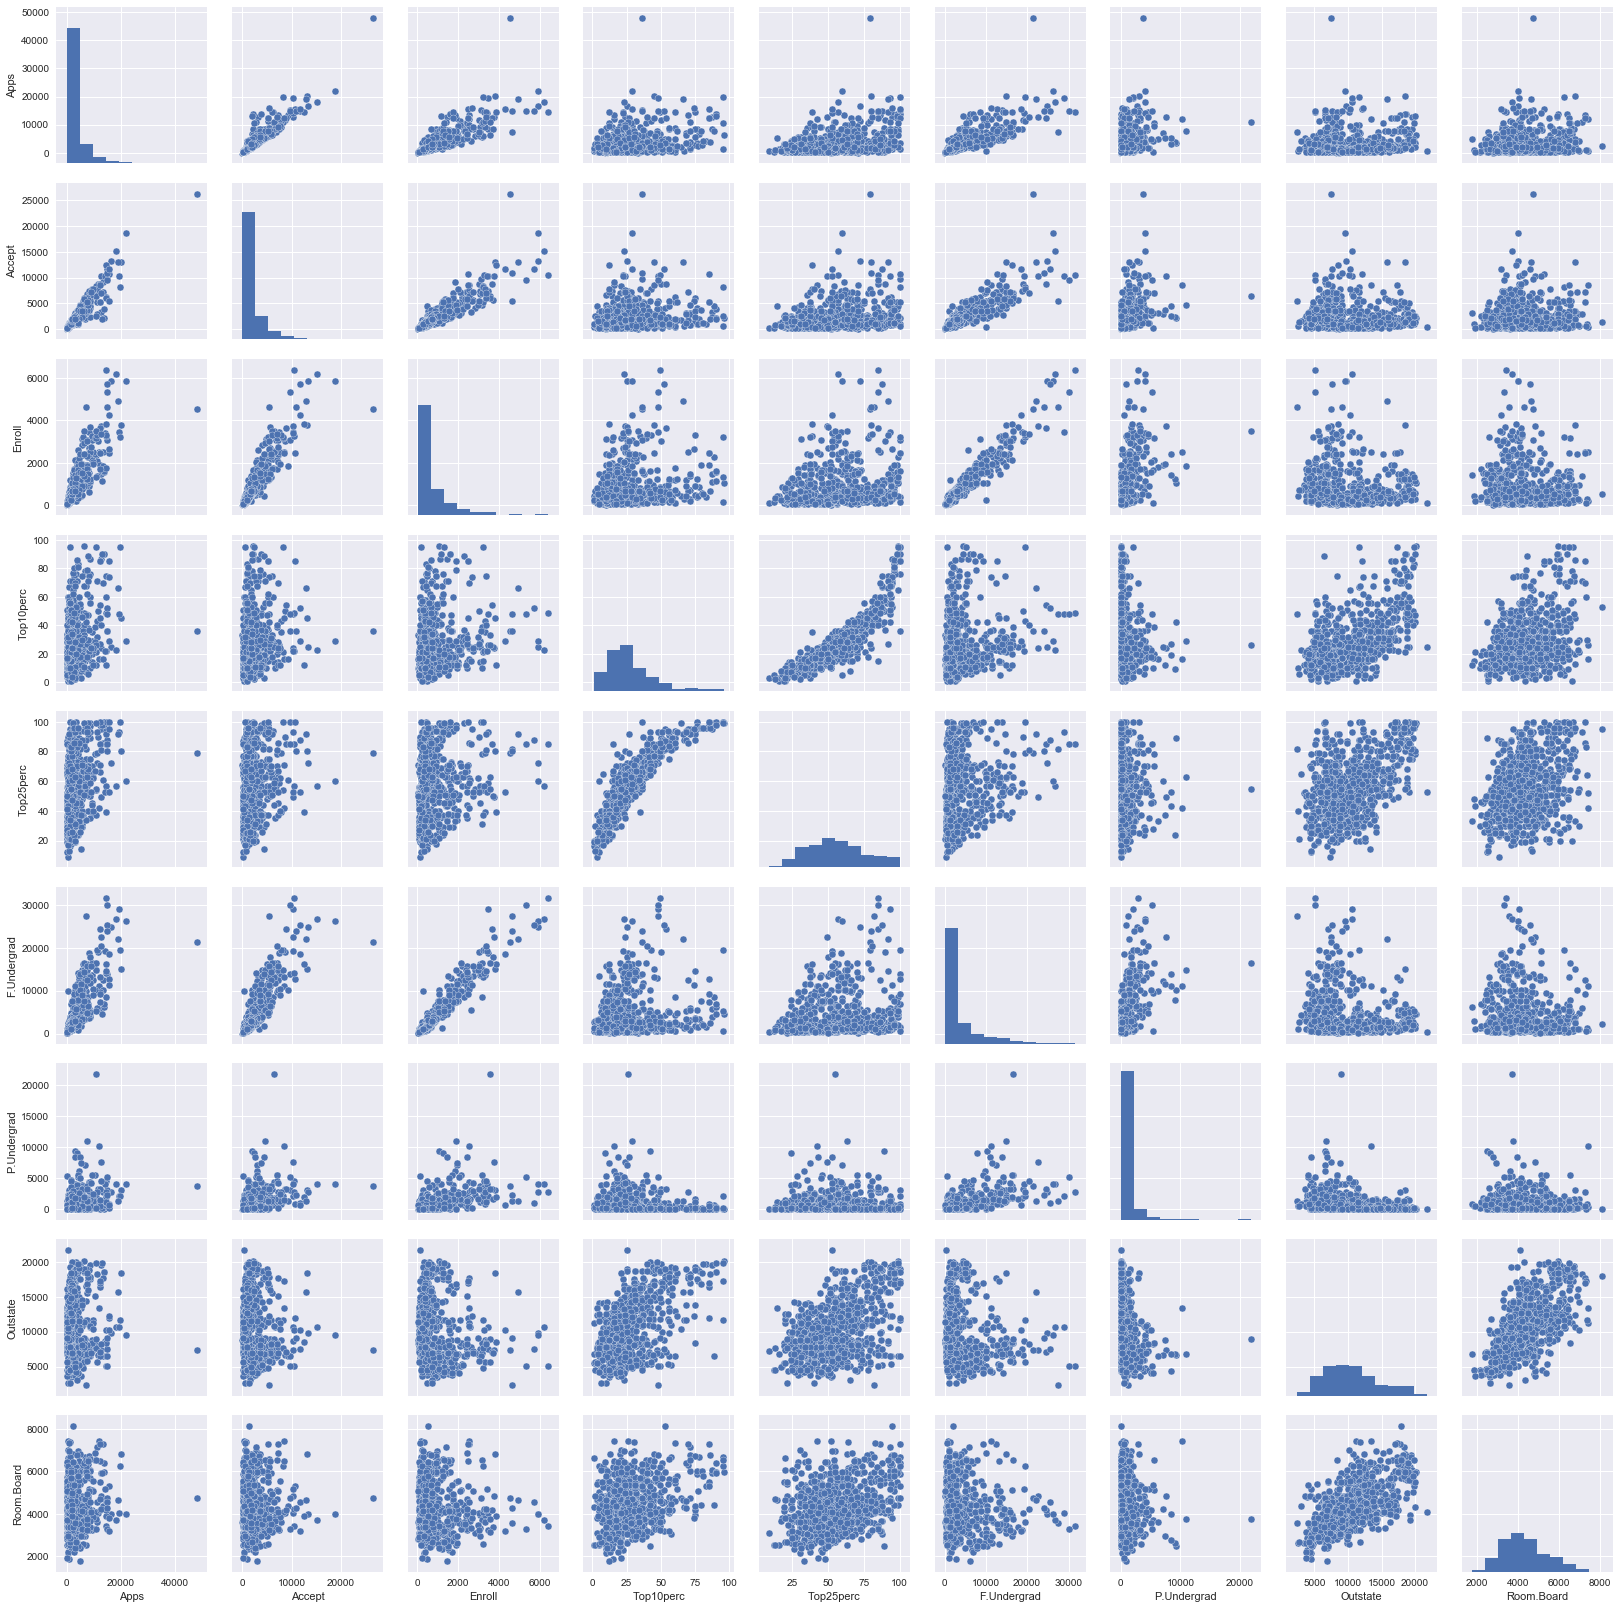

In [36]:
sns.pairplot(college.iloc[:,0:10])

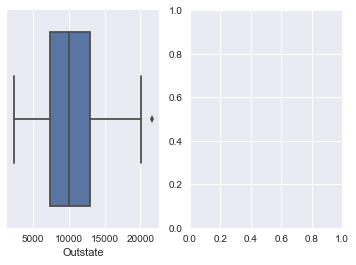

In [44]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(college.Outstate, ax=axs[0])


In [56]:
#gotta convert "yes" to 1 and "no" to zero
#college_dummies=pd.get_dummies(college.Private)
#college['private_value']=college_dummies[['Yes']]

In [80]:
private_college = college.loc[college['private_value'] > 0 ]
public_college = college.loc[college['private_value'] == 0 ]

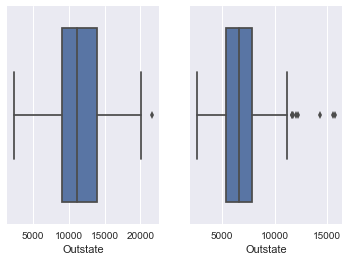

In [81]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(private_college.Outstate, ax=axs[0])
sns.boxplot(public_college.Outstate, ax=axs[1])


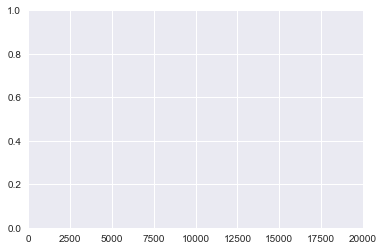

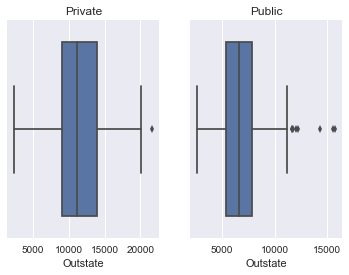

In [87]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
a=sns.boxplot(private_college.Outstate, ax=axs[0])
a.set_title('Private')
b=sns.boxplot(public_college.Outstate, ax=axs[1])
b.set_title('Public')

In [89]:
elite = college.loc[college['Top10perc'] > 50]

In [90]:
elite.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_value
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,5980.564103,2852.602564,1060.717949,67.615385,91.102564,4582.743590,324.935897,15248.564103,5336.794872,594.910256,1188.179487,89.320513,94.089744,10.614103,33.961538,18404.871795,83.384615,0.833333
std,5025.659837,2616.431918,1048.525544,13.540925,6.057280,5247.170534,596.303752,4115.230670,1112.051612,184.271693,545.748640,7.987805,6.982698,3.878168,14.045790,9651.812255,12.380578,0.375090
min,346.000000,274.000000,137.000000,51.000000,75.000000,510.000000,1.000000,5224.000000,3048.000000,400.000000,300.000000,59.000000,59.000000,2.900000,6.000000,4957.000000,51.000000,0.000000
25%,2175.750000,1099.500000,419.750000,56.000000,86.250000,1586.250000,30.000000,12219.000000,4370.000000,500.000000,871.250000,85.250000,92.000000,8.200000,23.000000,12644.250000,74.250000,1.000000
50%,3849.000000,1903.500000,669.500000,65.500000,93.000000,2483.500000,88.500000,16950.000000,5430.500000,550.000000,1100.000000,91.000000,96.000000,10.400000,33.500000,15944.000000,84.500000,1.000000
75%,8595.250000,3844.750000,1251.250000,76.750000,96.000000,5209.250000,330.500000,18411.500000,6055.000000,630.000000,1490.000000,95.000000,98.000000,13.050000,44.750000,21420.250000,93.000000,1.000000
max,19873.000000,12940.000000,5705.000000,96.000000,100.000000,25422.000000,3286.000000,20100.000000,8124.000000,1495.000000,4110.000000,100.000000,100.000000,19.300000,64.000000,56233.000000,100.000000,1.000000


In [92]:
elite_private_college = elite.loc[elite['private_value'] > 0 ]
elite_public_college = elite.loc[elite['private_value'] == 0 ]

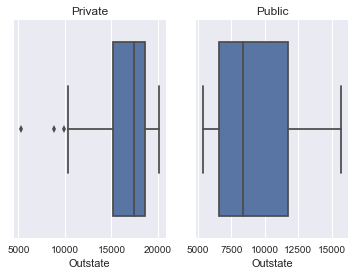

In [93]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
a=sns.boxplot(elite_private_college.Outstate, ax=axs[0])
a.set_title('Private')
b=sns.boxplot(elite_public_college.Outstate, ax=axs[1])
b.set_title('Public')

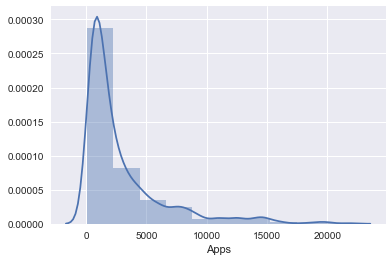

In [98]:
outliers_removed = college.loc[college['Apps']<30000]
sns.distplot(outliers_removed.Apps, bins=10)

In [99]:
#colleges be $$"

# 9: the auto dataset

In [100]:
df=pd.read_csv('../islir_exercises/islir_data/Auto.csv')

In [101]:
autos=df

In [105]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Quantitative descriptors:
    -mpg
    -cylinders
    -displacement
    -horsepower
    -weight
    -accleration
### Qualitative descriptors:
    -year
    -origin
    -name
    

In [135]:
#gotta find the range of each
autos.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


You can find the range by subtracting looking at the max and the min.
The mean and std are in the table


In [137]:
new_autos=autos.drop(autos.index[9:85])

In [138]:
new_autos.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.438629,5.370717,187.049844,2933.962617,15.723053,77.152648,1.598131
std,7.908184,1.653486,99.635385,810.642938,2.680514,3.111230,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


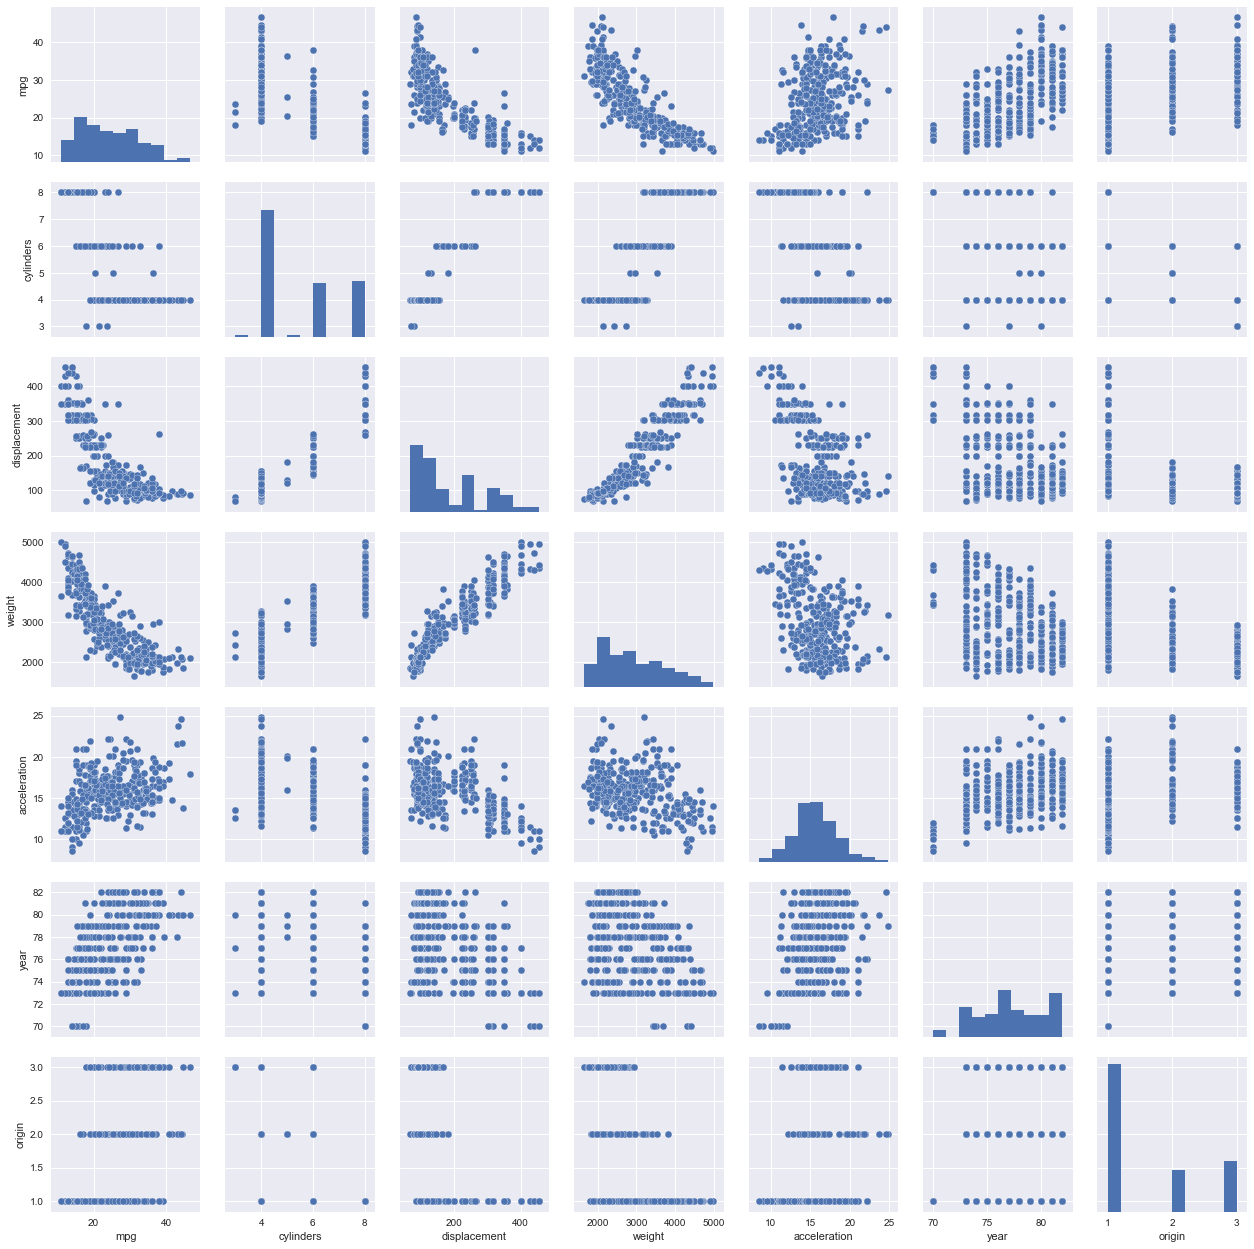

In [139]:
sns.pairplot(new_autos)

Wow, I've leared something about cars...

More cylinders = lower mpg, = greater wewight, = greater 'displacement', whatever that is...

in the mpg vs year, we can see mpg steadily going up on average, cool cool.

weights are declining as well.

# alright, Boston

In [140]:
df=pd.read_csv('../islir_exercises/islir_data/Boston.csv')

In [141]:
boston_df=df

In [143]:
print(boston_df)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12.5   7.8

In [148]:
boston_df.shape

(506, 14)

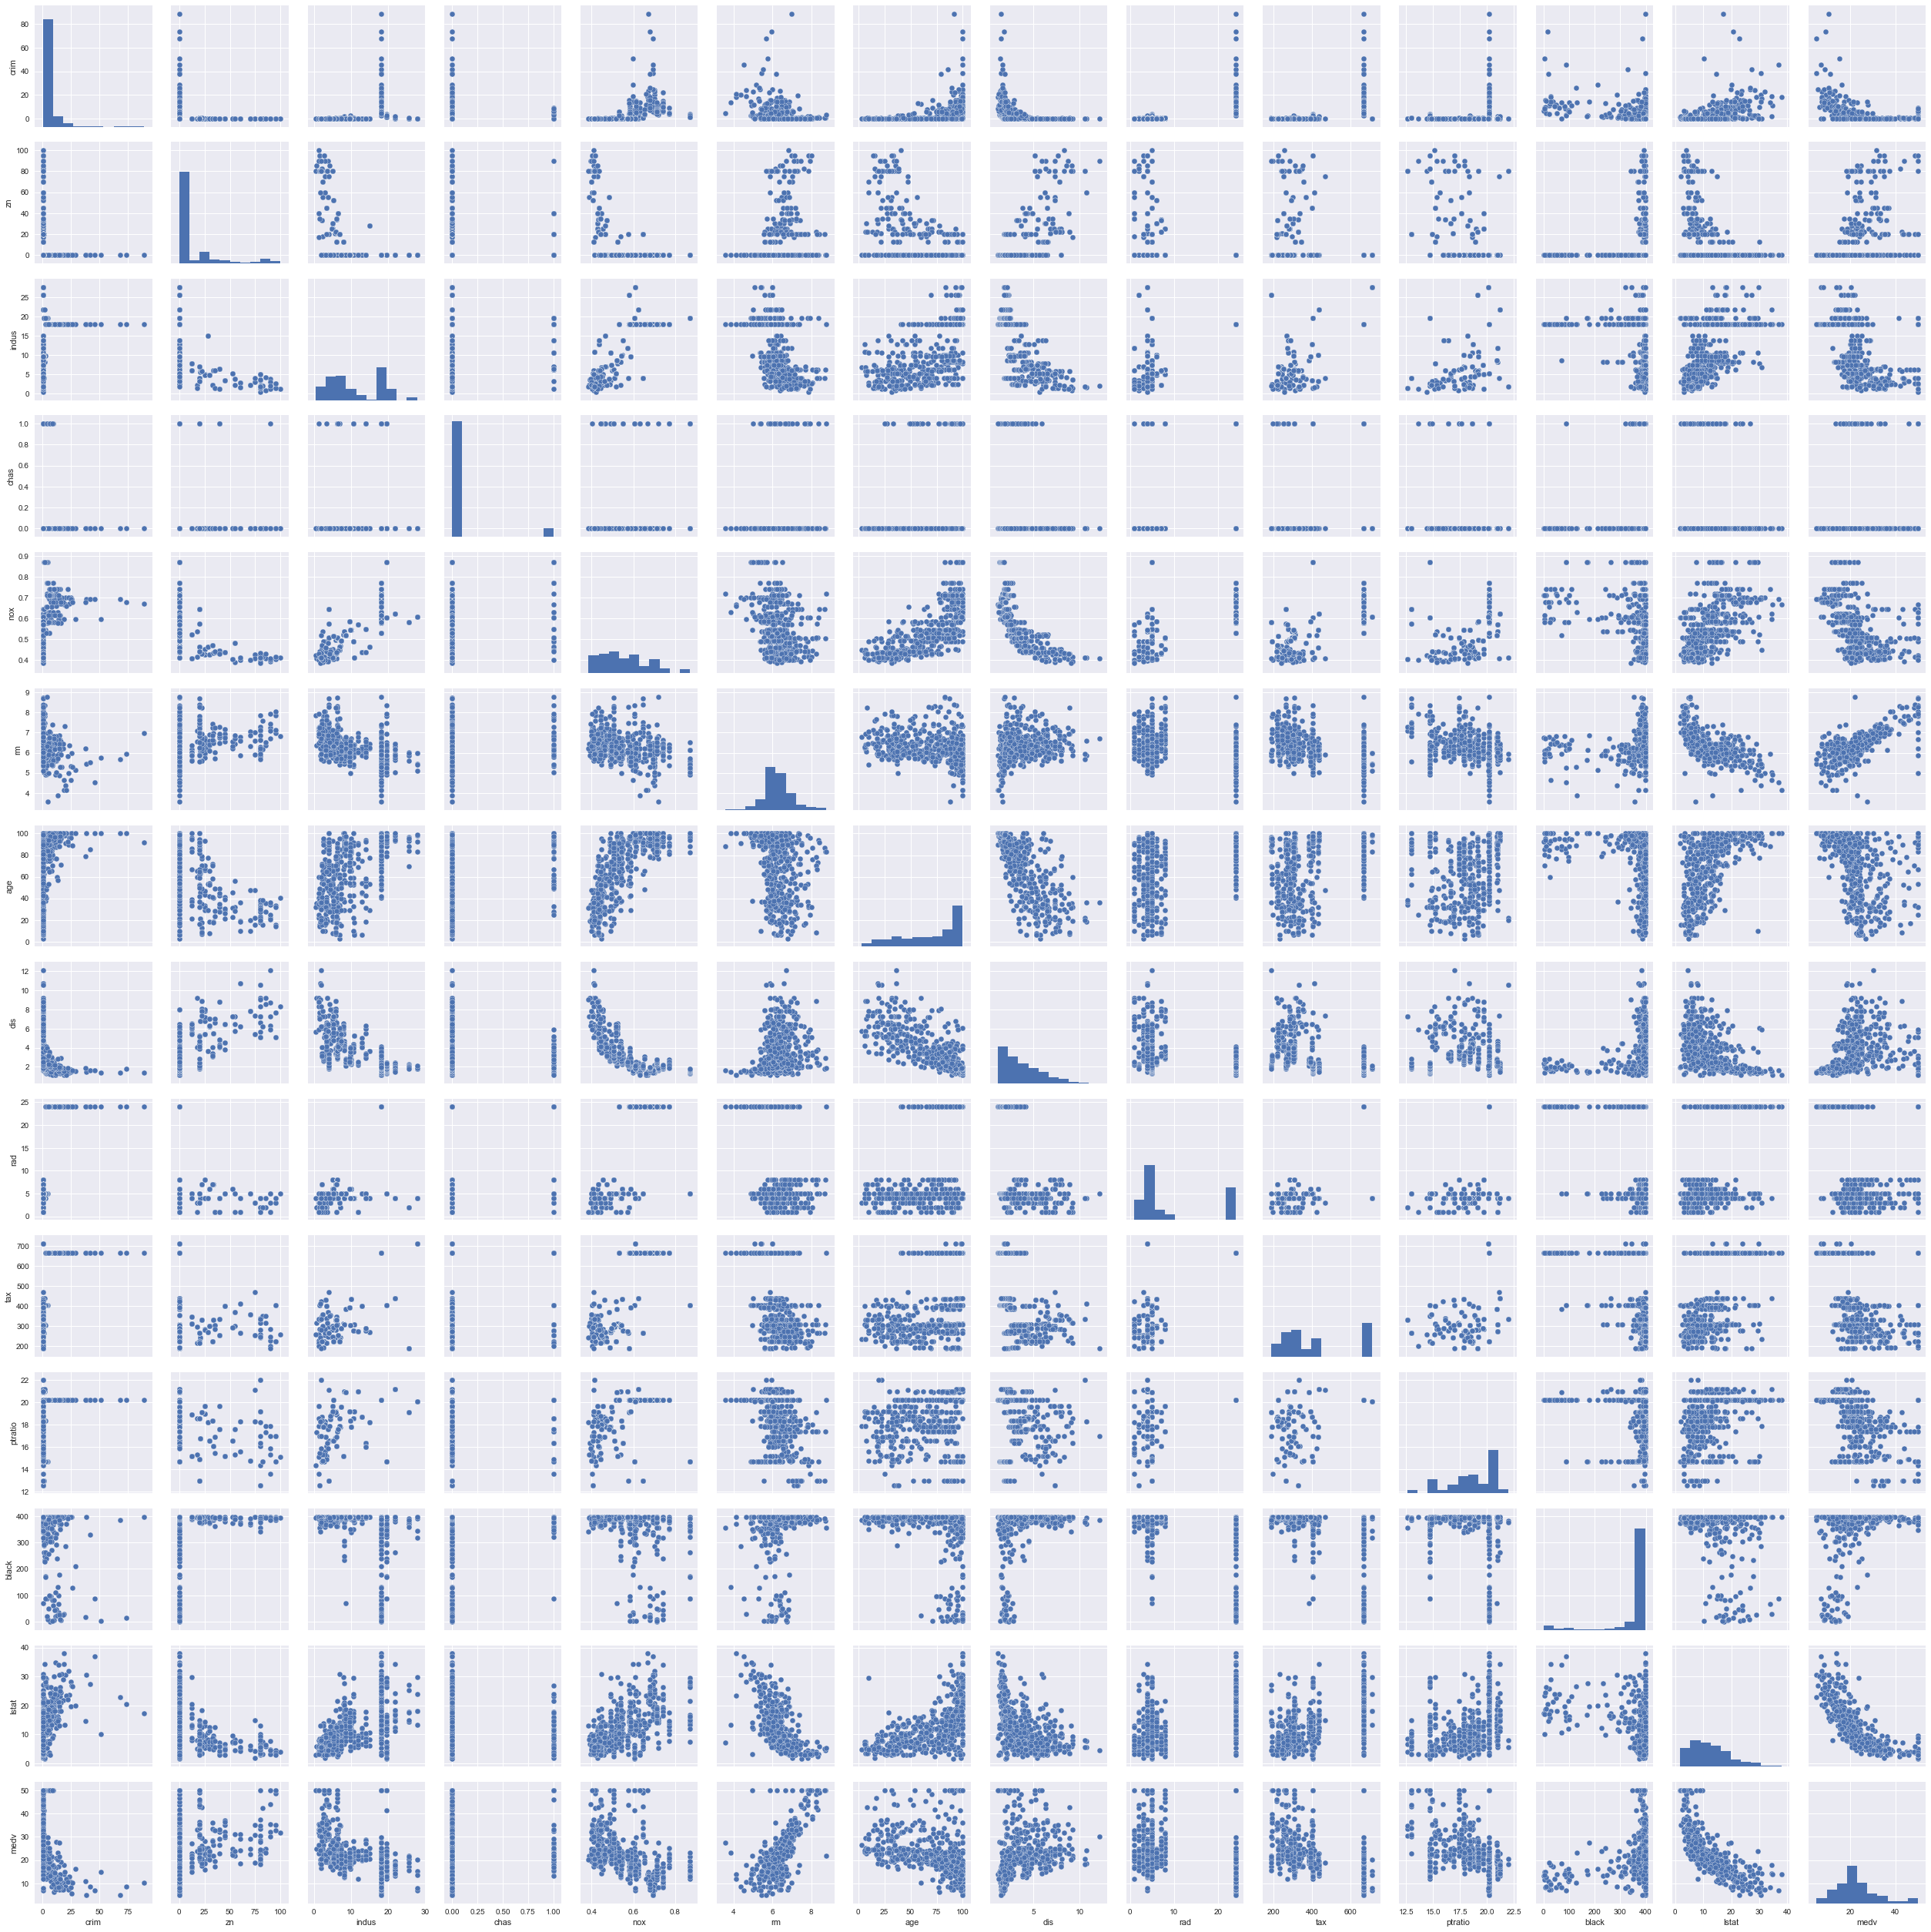

In [149]:
sns.pairplot(boston_df)

In [151]:
chas_boston = boston_df.loc[boston_df['chas']==1]

In [152]:
chas_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [153]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [154]:
boston_df.loc[boston_df['medv']==5.0]

#these are they with the lowest medivan values. WAY more crime. higher industry, higest pt ratio

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [160]:
boston_df.loc[boston_df['rm']> 7].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,388.275156,5.474063,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,9.487005,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,354.310000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,384.922500,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,390.660000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,395.305000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,396.900000,16.740000,50.000000


In [161]:
# 64 of em!

boston_df.loc[boston_df['rm']> 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [162]:
#13 of em dang


In [163]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


much lower crime in high-room houses, actually. so maybe they're big mansions? YEah, median property values are TWICE the average, too...

